In [103]:
#Import dependencies
import pandas as pd
import matplotlib.pyplot as plt
import scipy.stats as stats
from matplotlib_venn import venn3

#Import csv data and use Pandas to create a Data Frame
data_df = pd.read_csv("../Resources/Cleaned_CVD.csv")

#Reduce the data frame to the relevant rows for this portion of the study
data_df = data_df[["Heart Disease", "Diabetes", "Arthritis", "Skin Cancer", "Other Cancer", "Depression"]]
data_df.head(15)

,Heart Disease,Diabetes,Arthritis,Skin Cancer,Other Cancer,Depression
0,No,None,Yes,No,No,No
1,Yes,Yes,No,No,No,No
2,No,Yes,No,No,No,No
3,Yes,Yes,No,No,No,No
4,No,None,No,No,No,No
5,No,None,Yes,No,No,Yes
6,Yes,None,Yes,No,No,No
7,No,None,Yes,No,No,No
8,No,None,No,No,No,Yes
9,No,Yes,Yes,No,No,No


# Diabetes Study

In [48]:
#Examine prevalence of various comorbidities in those who have Cardio-Vascular Disease (CVD),
#beginning with Diabetes
with_CVD = data_df.loc[data_df["Heart Disease"]=="Yes"]
diabetes_count = with_CVD.groupby(["Diabetes"])["Diabetes"].count()
no_CVD = data_df.loc[data_df["Heart Disease"] == "No"]
diabetes_count2 = no_CVD.groupby(["Diabetes"])["Diabetes"].count()
#For clarity, compare the numbers to ensure that all sample sizes are large enough
print(f"With CVD: {diabetes_count}")
print(f"Without CVD: {diabetes_count2}")


With CVD: Diabetes
None                          15705
Pre-diabetes or Borderline      794
Pregnacy-Induced                 96
Yes                            8376
Name: Diabetes, dtype: int64
Without CVD: Diabetes
None                          243436
Pre-diabetes or Borderline      6102
Pregnacy-Induced                2550
Yes                            31795
Name: Diabetes, dtype: int64


Orange represents those with Pre-Diabetes or Borderline Cases while Green 
 represents those with Pregnancy-Induced Temporary Diabetes 


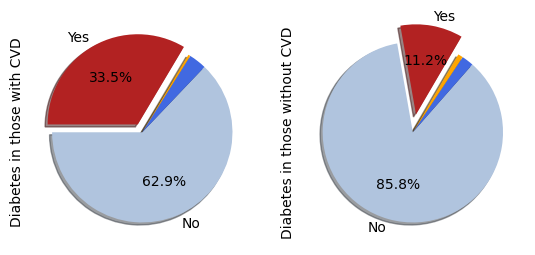

In [49]:
#Plot a pie chart for each case to visualize the difference in frequency of Diabetes
#Exclude the tiny percentages for Pregnancy Induced and Pre-Diabetes categories
def autopct(pct):
    if pct > 10:
        return('%1.1f%%' % pct ) 
    else:
        return("")
plt.subplot(1,2,1)
diabetes_count.plot(kind = "pie", autopct=autopct, shadow = True, explode = (0, 0, 0, 0.1), \
                    startangle = 180, labels = ['No','','','Yes'], colors = ['lightsteelblue', \
                                                            'royalblue', 'orange', 'firebrick'])
plt.ylabel("Diabetes in those with CVD")
print("Orange represents those with Pre-Diabetes or Borderline Cases while"+ \
      " Green \n represents those with Pregnancy-Induced Temporary Diabetes ")

#Add a subplot with the non-CVD Diabetes pie chart
plt.subplot(1,2,2)
diabetes_count2.plot(kind = "pie", autopct=autopct, shadow = True, explode = (0, 0, 0, 0.2), \
                     startangle = 100, labels = ['No','','','Yes'], colors = ['lightsteelblue', \
                                                            'royalblue', 'orange', 'firebrick'])
plt.ylabel("Diabetes in those without CVD")

#Show the charts side-by-side
plt.show()

## Chi-Squared Test

In [50]:
#Complete a chi-squared test by hand for practice, show the resulting table as an example for 
#this and future tests. 
chi_test = pd.DataFrame({"No CVD":diabetes_count2, "With CVD": diabetes_count})
total1 = sum(diabetes_count2)
total2 = sum(diabetes_count)
tot_total = total1 + total2
chi_test["No: Expected Values"] = ((chi_test["No CVD"]+chi_test["With CVD"])/tot_total)*total1
chi_test["Yes: Expected Values"] = ((chi_test["With CVD"]+chi_test["No CVD"])/tot_total)*total2
chi_test["No: (O-E)^2/E"] = ((chi_test["No CVD"]-chi_test["No: Expected Values"])**2)/ \
    chi_test["No: Expected Values"]
chi_test["Yes: (O-E)^2/E"] = ((chi_test["With CVD"]-chi_test["Yes: Expected Values"])**2)/ \
    chi_test["Yes: Expected Values"]
chi_square = sum(chi_test["No: (O-E)^2/E"])+sum(chi_test["Yes: (O-E)^2/E"])
print(f"The chi-squared value for this test is: {round(chi_square,2)}")
chi_test


The chi-squared value for this test is: 10418.55


,No CVD,With CVD,No: Expected Values,Yes: Expected Values,No: (O-E)^2/E,Yes: (O-E)^2/E
Diabetes,,,,,,
None,243436,15705,238189.320854,20951.679146,115.570429,1313.863288
Pre-diabetes or Borderline,6102,794,6338.454959,557.545041,8.820911,100.280594
Pregnacy-Induced,2550,96,2432.069580,213.930420,5.718415,65.009848
Yes,31795,8376,36923.154607,3247.845393,712.235180,8097.050965


# Arthritis Study

In [51]:
#Examine prevalence of Arthritis in those who have Cardio-Vascular Disease (CVD)
with_CVD = data_df.loc[data_df["Heart Disease"]=="Yes"]
arthritis_count = with_CVD.groupby(["Arthritis"])["Arthritis"].count()
no_CVD = data_df.loc[data_df["Heart Disease"] == "No"]
arthritis_count2 = no_CVD.groupby(["Arthritis"])["Arthritis"].count()
#For clarity, compare the numbers to ensure that all sample sizes are large enough
print(f"With CVD: {arthritis_count}")
print(f"Without CVD: {arthritis_count2}")

With CVD: Arthritis
No     10719
Yes    14252
Name: Arthritis, dtype: int64
Without CVD: Arthritis
No     197064
Yes     86819
Name: Arthritis, dtype: int64


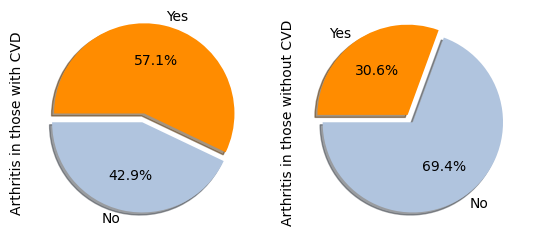

In [52]:
#Plot a pie chart for each case to visualize the difference in frequency of Arthritis
plt.subplot(1,2,1)
arthritis_count.plot(kind = "pie", autopct=autopct, shadow = True, explode = (0, 0.1), \
                     startangle = 180, colors = ['lightsteelblue', 'darkorange'])
plt.ylabel("Arthritis in those with CVD")
plt.subplot(1,2,2)
arthritis_count2.plot(kind = "pie", autopct=autopct, shadow = True, explode = (0, 0.1), \
                      startangle = 180, colors = ['lightsteelblue', 'darkorange'])
plt.ylabel("Arthritis in those without CVD")
plt.show()

### Chi-Squared Test

In [53]:
chi_test = pd.DataFrame({"No CVD":arthritis_count2, "With CVD": arthritis_count})
stats.chi2_contingency(chi_test[["No CVD", "With CVD"]])

Chi2ContingencyResult(statistic=7315.345489535121, pvalue=0.0, dof=1, expected_freq=array([[190983.64077849,  16799.35922151],
       [ 92899.35922151,   8171.64077849]]))

# Skin Cancer Study

In [54]:
#Examine prevalence of Skin Cancer in those who have Cardio-Vascular Disease (CVD)
with_CVD = data_df.loc[data_df["Heart Disease"]=="Yes"]
skin_count = with_CVD.groupby(["Skin Cancer"])["Skin Cancer"].count()
no_CVD = data_df.loc[data_df["Heart Disease"] == "No"]
skin_count2 = no_CVD.groupby(["Skin Cancer"])["Skin Cancer"].count()
#For clarity, compare the numbers to ensure that all sample sizes are large enough, identify any 
#anomalies!
print(f"With CVD: {skin_count}")
print(f"Without CVD: {skin_count2}")

With CVD: Skin Cancer
No     20281
Yes     4690
Name: Skin Cancer, dtype: int64
Without CVD: Skin Cancer
No     258579
Yes     25304
Name: Skin Cancer, dtype: int64


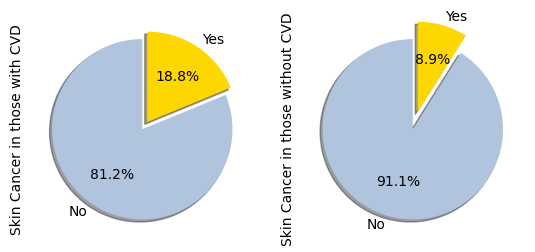

In [55]:
#Plot a pie chart for each case to visualize the difference in frequency of Arthritis
plt.subplot(1,2,1)
skin_count.plot(kind = "pie", autopct=autopct, shadow = True, explode = (0, 0.1), startangle = 90, \
                colors = ['lightsteelblue', 'gold'])
plt.ylabel("Skin Cancer in those with CVD")
plt.subplot(1,2,2)
skin_count2.plot(kind = "pie", autopct='%1.1f%%', explode = (0, 0.2), shadow = True, startangle = 90, \
                 colors = ['lightsteelblue', 'gold'])
plt.ylabel("Skin Cancer in those without CVD")
plt.show()

### Chi-Squared Test

In [56]:
chi_test = pd.DataFrame({"No CVD":skin_count2, "With CVD": skin_count})
stats.chi2_contingency(chi_test[["No CVD", "With CVD"]])

Chi2ContingencyResult(statistic=2547.9855141817616, pvalue=0.0, dof=1, expected_freq=array([[256314.02986524,  22545.97013476],
       [ 27568.97013476,   2425.02986524]]))

# Other Cancer Study

In [57]:
#Examine prevalence of Other Cancer in those who have Cardio-Vascular Disease (CVD)
with_CVD = data_df.loc[data_df["Heart Disease"]=="Yes"]
cancer_count = with_CVD.groupby(["Other Cancer"])["Other Cancer"].count()
no_CVD = data_df.loc[data_df["Heart Disease"] == "No"]
cancer_count2 = no_CVD.groupby(["Other Cancer"])["Other Cancer"].count()
#For clarity, compare the numbers to ensure that all sample sizes are large enough, identify any 
#anomalies
print(f"With CVD: {cancer_count}")
print(f"Without CVD: {cancer_count2}")

With CVD: Other Cancer
No     20256
Yes     4715
Name: Other Cancer, dtype: int64
Without CVD: Other Cancer
No     258720
Yes     25163
Name: Other Cancer, dtype: int64


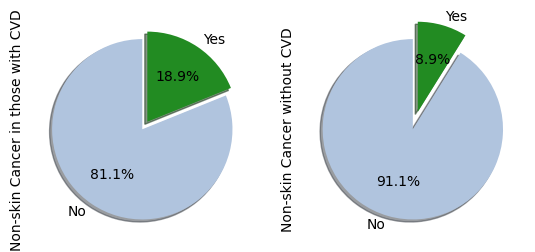

In [58]:
#Plot a pie chart for each case to visualize the difference in frequency of Arthritis
plt.subplot(1,2,1)
cancer_count.plot(kind = "pie", autopct=autopct, shadow = True, explode = (0, 0.1), startangle = 90, \
                  colors = ['lightsteelblue', 'forestgreen'])
plt.ylabel("Non-skin Cancer in those with CVD")
plt.subplot(1,2,2)
cancer_count2.plot(kind = "pie", autopct='%1.1f%%', explode = (0, 0.2), shadow = True, startangle = 90, 
                   colors = ['lightsteelblue', 'forestgreen'])
plt.ylabel("Non-skin Cancer without CVD")
plt.show()

### Chi-Squared Test

In [59]:
chi_test = pd.DataFrame({"No CVD":cancer_count2, "With CVD": cancer_count})
stats.chi2_contingency(chi_test[["No CVD", "With CVD"]])

Chi2ContingencyResult(statistic=2635.037602089007, pvalue=0.0, dof=1, expected_freq=array([[256420.65120737,  22555.34879263],
       [ 27462.34879263,   2415.65120737]]))

# Depression Study

In [60]:
#Examine prevalence of Other Cancer in those who have Cardio-Vascular Disease (CVD)
with_CVD = data_df.loc[data_df["Heart Disease"]=="Yes"]
depress_count = with_CVD.groupby(["Depression"])["Depression"].count()
no_CVD = data_df.loc[data_df["Heart Disease"] == "No"]
depress_count2 = no_CVD.groupby(["Depression"])["Depression"].count()
#For clarity, compare the numbers to ensure that all sample sizes are large enough, identify any 
#anomalies
print(f"With CVD: {depress_count}")
print(f"Without CVD: {depress_count2}")

With CVD: Depression
No     18870
Yes     6101
Name: Depression, dtype: int64
Without CVD: Depression
No     228083
Yes     55800
Name: Depression, dtype: int64


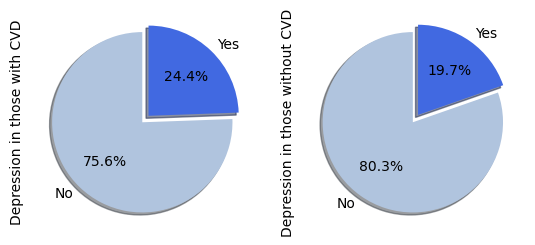

In [62]:
#Plot a pie chart for each case to visualize the difference in frequency of Arthritis
plt.subplot(1,2,1)
depress_count.plot(kind = "pie", autopct=autopct, shadow = True, explode = (0, 0.1), startangle = 90, \
                   colors = ['lightsteelblue', 'royalblue'])
plt.ylabel("Depression in those with CVD")
plt.subplot(1,2,2)
depress_count2.plot(kind = "pie", autopct='%1.1f%%', explode = (0, 0.1), shadow = True, startangle = 90, \
                    colors = ['lightsteelblue', 'royalblue'])
plt.ylabel("Depression in those without CVD")
plt.show()

### Chi-Squared Test

In [ ]:
chi_test = pd.DataFrame({"No CVD":depress_count2, "With CVD": depress_count})
stats.chi2_contingency(chi_test[["No CVD", "With CVD"]])

Chi2ContingencyResult(statistic=326.4478398515398, pvalue=5.70775202680712e-73, dof=1, expected_freq=array([[226986.72673496,  19966.27326504],
       [ 56896.27326504,   5004.72673496]]))

## Investigation of Overlap Between Conditions

In [76]:
#Create the needed counts and data for those with CVD
heart_and_diabetes = 0
heart_and_cancer = 0
heart_and_arthritis = 0
heart_and_diabetes_and_cancer = 0
heart_and_diabetes_and_arthritis = 0
heart_and_cancer_and_arthritis = 0
all_conditions = 0
for index in data_df.index:
    if data_df["Heart Disease"][index]=="Yes":
        if data_df["Diabetes"][index] in ["Yes", "Pre-diabetes or Borderline","Pregnacy-Induced"]:
            heart_and_diabetes+=1
            if data_df["Skin Cancer"][index] == "Yes" or data_df["Other Cancer"][index] == "Yes":
                heart_and_diabetes_and_cancer += 1
                if data_df["Arthritis"][index] == "Yes":
                    all_conditions += 1
            if data_df["Arthritis"][index] == "Yes":
                heart_and_diabetes_and_arthritis += 1
        if data_df["Skin Cancer"][index] == "Yes" or data_df["Other Cancer"][index] == "Yes":
            heart_and_cancer += 1
            if data_df["Arthritis"][index] == "Yes":
                heart_and_cancer_and_arthritis += 1 
        if data_df["Arthritis"][index] == "Yes":
            heart_and_arthritis += 1
subsets = (heart_and_arthritis, heart_and_cancer, heart_and_cancer_and_arthritis, \
            heart_and_diabetes, heart_and_diabetes_and_arthritis, heart_and_diabetes_and_cancer, \
                all_conditions)

In [77]:
#Create the needed data for those without CVD
noheart_and_diabetes = 0
noheart_and_cancer = 0
noheart_and_arthritis = 0
noheart_and_diabetes_and_cancer = 0
noheart_and_diabetes_and_arthritis = 0
noheart_and_cancer_and_arthritis = 0
all_conditions_minus_heart = 0
for index in data_df.index:
    if data_df["Heart Disease"][index]=="No":
        if data_df["Diabetes"][index] in ["Yes", "Pre-diabetes or Borderline","Pregnacy-Induced"]:
            noheart_and_diabetes+=1
            if data_df["Skin Cancer"][index] == "Yes" or data_df["Other Cancer"][index] == "Yes":
                noheart_and_diabetes_and_cancer += 1
                if data_df["Arthritis"][index] == "Yes":
                    all_conditions_minus_heart += 1
            if data_df["Arthritis"][index] == "Yes":
                noheart_and_diabetes_and_arthritis += 1
        if data_df["Skin Cancer"][index] == "Yes" or data_df["Other Cancer"][index] == "Yes":
            noheart_and_cancer += 1
            if data_df["Arthritis"][index] == "Yes":
                noheart_and_cancer_and_arthritis += 1 
        if data_df["Arthritis"][index] == "Yes":
            noheart_and_arthritis += 1
subsets2 = (noheart_and_arthritis, noheart_and_cancer, noheart_and_cancer_and_arthritis, \
            noheart_and_diabetes, noheart_and_diabetes_and_arthritis, noheart_and_diabetes_and_cancer, \
                all_conditions_minus_heart)

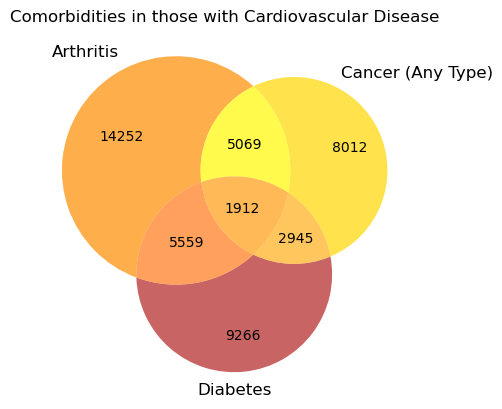

In [86]:
#With CVD Venn Diagram
venn3(subsets = subsets, set_labels=("Arthritis", "Cancer (Any Type)", "Diabetes"), \
      set_colors=['darkorange', 'gold', 'firebrick'], alpha=0.7)
plt.title('Comorbidities in those with Cardiovascular Disease')
plt.show()


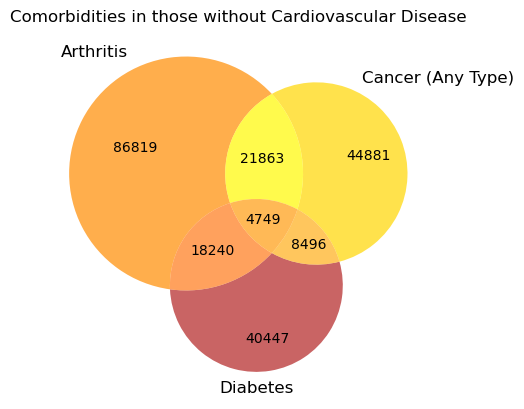

In [87]:
#Without CVD Venn Diagram
venn3(subsets = subsets2, set_labels=("Arthritis", "Cancer (Any Type)", "Diabetes"), \
      set_colors=['darkorange', 'gold', 'firebrick'], alpha=0.7)
plt.title('Comorbidities in those without Cardiovascular Disease')
plt.show()

## Chi-Squared Investigation of Whether These Proportions are Consistent
 We note that the relative sizes of our Venn-Diagram circles are very similar between the two plots. This leads to the question: Are the relative frequencies of Arthritis, Diabetes, and Cancer in those with CVD the same as in those without CVD?

In [100]:
dictionary_of_diseases = {"With CVD": [heart_and_arthritis, heart_and_cancer, heart_and_cancer_and_arthritis, heart_and_diabetes,\
                            heart_and_diabetes_and_arthritis, heart_and_diabetes_and_cancer, all_conditions], \
                            "Without CVD": [noheart_and_arthritis, noheart_and_cancer, noheart_and_cancer_and_arthritis, noheart_and_diabetes, \
                            noheart_and_diabetes_and_arthritis, noheart_and_diabetes_and_cancer, all_conditions_minus_heart]}
comorbidity_df = pd.DataFrame(dictionary_of_diseases)
(chi_squared, pvalue, dof, expecteds) = stats.chi2_contingency(comorbidity_df[["With CVD", "Without CVD"]])
no_CVD_expected = []
CVD_expected = []
for list in expecteds:
    no_CVD_expected.append(round(list[1],2))
    CVD_expected.append(round(list[0],2))
comorbidity_df["With CVD Expected"] = CVD_expected
comorbidity_df["Without CVD Expected"] = no_CVD_expected
print(f"The Chi-Squared test value is {chi_squared}, which yields a p-value of {pvalue}.")
comorbidity_df

The Chi-Squared test value is 2791.49365086824, which yields a p-value of 0.0.


,With CVD,Without CVD,With CVD Expected,Without CVD Expected
0,14252,86819,17437.35,83633.65
1,8012,44881,9125.41,43767.59
2,5069,21863,4646.46,22285.54
3,9266,40447,8576.77,41136.23
4,5559,18240,4105.94,19693.06
5,2945,8496,1973.87,9467.13
6,1912,4749,1149.19,5511.81
